# How do I read tabular data?

In [1]:
import pandas as pd

orders = pd.read_csv('http://bit.ly/chiporders',sep='\t')

orders.head(2)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39


In [2]:
user_cols = ['user_id','age','gender','occupation','zip_code']

users = pd.read_csv('http://bit.ly/movieusers',delimiter = '|'
                    ,names = user_cols,header=None)

users.head(2)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


# How do I select a pandas Series from a dataframe?

In [3]:
ufo = pd.read_csv('http://bit.ly/uforeports',delimiter=',')

ufo.head(2)


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [4]:
ufo['Location'] = ufo.City +', '+ ufo.State

ufo.head(2)

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"


# Why do some pandas commands end with parentheses (and others don't)?

In [5]:
movies = pd.read_csv('http://bit.ly/imdbratings')

movies.head(2)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"


In [6]:
movies.describe(include='all')

,star_rating,title,content_rating,genre,duration,actors_list
count,979.000000,979,976,979,979.000000,979
unique,NaN,975,12,16,NaN,969
top,NaN,The Girl with the Dragon Tattoo,R,Drama,NaN,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,NaN,2,460,278,NaN,6
mean,7.889785,NaN,NaN,NaN,120.979571,NaN
std,0.336069,NaN,NaN,NaN,26.218010,NaN
min,7.400000,NaN,NaN,NaN,64.000000,NaN
25%,7.600000,NaN,NaN,NaN,102.000000,NaN
50%,7.800000,NaN,NaN,NaN,117.000000,NaN
75%,8.100000,NaN,NaN,NaN,134.000000,NaN


In [7]:
movies.shape 

(979, 6)

In [8]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

> Methods for a datadrame have parentheses ()(like describe()) while attributes of a dataframe(dtype,shape) don't have parentheses. Just like JAVA OOP.

# Renaming columns

In [9]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [10]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time',
       'Location'],
      dtype='object')

## I

In [11]:
ufo.rename(columns = {'Colors Reported': 'Colors_Reported','Shape Reported':'Shape_reported'}
           ,inplace=True)
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_reported', 'State', 'Time',
       'Location'],
      dtype='object')

## II

In [12]:
ufo_cols = ['city','colors_reported','shape_reported',
            'state','time','location']
ufo.columns = ufo_cols
ufo.head(2)

,city,colors_reported,shape_reported,state,time,location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"


### III

In [13]:
ufo_cols_again = ['city','colors_reported','shape_reported',
            'state','time']
ufo_again = pd.read_csv('http://bit.ly/uforeports',
                  names=ufo_cols_again,header=0)
ufo_again.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

In [14]:
#to replace spaces in all the column names :
# ufo.columns = ufo.columns.str.replace(' ','_')

# How do I remove columns from a pandas DataFrame?

In [15]:
ufo.head(2)

,city,colors_reported,shape_reported,state,time,location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"


In [16]:
ufo.drop('colors_reported',axis=1,inplace=True)
ufo.columns

Index(['city', 'shape_reported', 'state', 'time', 'location'], dtype='object')

In [17]:
# To delete multiple columns :
#    ufo.drop(['col1','col2',....],axis=1,inplace=True)

In [18]:
ufo.head(3)

,city,shape_reported,state,time,location
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"


In [19]:
#To delete rows :
ufo.drop([0,1],axis = 0,inplace=True)
ufo.head(3)

,city,shape_reported,state,time,location
2,Holyoke,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [20]:
youtube = pd.read_csv('D:\youtube_data1.txt',delimiter='\t')
youtube.shape

(33821, 11)

# How do I sort a pandas Dataframe or a Series?

In [21]:
movies.head(2)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"


In [22]:
# Sorts the data and returns a series
movies['title'].sort_values(ascending = False).head(3)

864         [Rec]
526          Zulu
615    Zombieland
Name: title, dtype: object

In [23]:
# Sorts the data and returs a dataframe
movies.sort_values('title').head(2)

# movie.sort('title') is deprecated

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


In [24]:
# Sorting with multiple columns
movies.sort_values(['content_rating','duration']).head(2)
#First sorts by content rating and then sorts by duration

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."


# How do I filter rows of a pandas DataFrame by column value?

In [25]:
movies.loc[movies['duration'] > 200,:].head(2)

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."


# How do I apply multiple filter criteria to a pandas DataFrame?

In [26]:
movies.loc[(movies['duration'] >= 200) & (movies['genre'] == "Drama")]


,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [27]:
#for multipe values of a boolean condition (ex: need genre of either drama or crime)

movies.loc[(movies['duration'] >= 200) & (movies['genre'].isin(["Drama","Crime"]))]


,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


# Miscellaneous Questions


In [28]:
# Only selecting required columns from a csv

modified_ufo = pd.read_csv('http://bit.ly/uforeports', usecols=['City','State'])
modified_ufo.head(3)

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [29]:
# To read only n number of rows
nrow_ufo = pd.read_csv('http://bit.ly/uforeports', nrows = 3)
nrow_ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [30]:
# Iterating series

for c in nrow_ufo.City:
    print(c)

Ithaca
Willingboro
Holyoke


In [31]:
# Iterating dataframe

for index, rows in nrow_ufo.iterrows():
    print(index, rows['City'], rows['State'])

0 Ithaca NY
1 Willingboro NJ
2 Holyoke CO


In [32]:
# Drop all non-numeric column from Dataframe
import numpy as np
drinks = pd.read_csv("http://bit.ly/drinksbycountry")
drinks.head(2)
drinks.select_dtypes(include = [np.number]).head(2)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9


# How do I use the "axis" parameter in pandas?

In [33]:
drinks.drop(2,axis = 0).head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe


In [34]:
drinks.mean(axis = 0) #column

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [35]:
drinks.mean(axis = 1).head(3) #row

0     0.000
1    69.975
2     9.925
dtype: float64

# How do I use string methods in pandas?

In [36]:
orders.head(2)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39


In [37]:
orders.item_name.str.upper().head(2)

0    CHIPS AND FRESH TOMATO SALSA
1                            IZZE
Name: item_name, dtype: object

In [38]:
# Finds chicken
orders[orders.item_name.str.contains('Chicken')].head(2)

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98


In [39]:
#Method chaining : removig brackets from choice_description
orders.choice_description.str.replace('[','').str.replace(']','').head(3)

0           NaN
1    Clementine
2         Apple
Name: choice_description, dtype: object

In [40]:
# using regex
orders.choice_description.str.replace('[\[\]]','').head(2)

0           NaN
1    Clementine
Name: choice_description, dtype: object

# How do I change the data type of a pandas Series?


In [41]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [42]:
# convert beer_servings from int64 to float64
drinks['beer_servings'] = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [43]:
# change before reading the file
before_drinks = pd.read_csv("http://bit.ly/drinksbycountry", nrows = 3, dtype = {'beer_servings':float})
before_drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [44]:
#Returns True/False
orders.item_name.str.contains('Chicken').head(2)

0    False
1    False
Name: item_name, dtype: bool

In [45]:
#Returns 0/1
orders.item_name.str.contains('Chicken').astype(int).head(2)

0    0
1    0
Name: item_name, dtype: int32

# When should I use a "groupby" in pandas?

In [46]:
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0,0,0.0,Asia
1,Albania,89.0,132,54,4.9,Europe


In [47]:
drinks.groupby('continent').beer_servings.agg(['count','max','min','mean'])

,count,max,min,mean
continent,,,,
Africa,53,376.0,0.0,61.471698
Asia,44,247.0,0.0,37.045455
Europe,45,361.0,0.0,193.777778
North America,23,285.0,1.0,145.434783
Oceania,16,306.0,0.0,89.687500
South America,12,333.0,93.0,175.083333


In [48]:
# group all column
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


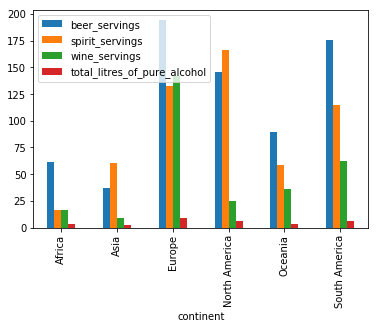

In [49]:
%matplotlib inline
drinks.groupby('continent').mean().plot(kind='bar')

# How do I explore a pandas Series?

In [50]:
movies.head(2)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"


In [51]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [52]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [53]:
movies.genre.value_counts().head(2)

Drama     278
Comedy    156
Name: genre, dtype: int64

In [54]:
# normalize value_counts ,i.e., show their %age composition
(movies.genre.value_counts(normalize=True)*100).head(4)

Drama     28.396323
Comedy    15.934627
Action    13.891726
Crime     12.665986
Name: genre, dtype: float64

In [55]:
#to view unique values
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [56]:
# count of unique values
movies.genre.nunique()

16

In [57]:
# for cross description among columns. Ex: genre and content_rating
#rows are genre and columns are content ratings
pd.crosstab(movies.genre, movies.content_rating).head(2)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0


In [58]:
%matplotlib inline

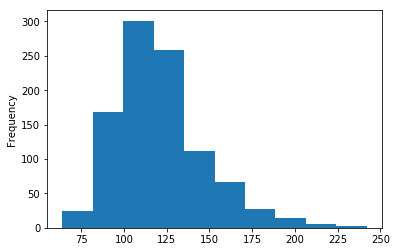

In [59]:
movies.duration.plot(kind = 'hist')

# How do I handle missing values in pandas?

In [60]:
ufo_sight = pd.read_csv('http://bit.ly/uforeports')
ufo_sight.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [61]:
# check NULL
ufo_sight.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [62]:
# check not null
ufo_sight.notnull().tail(3)

,City,Colors Reported,Shape Reported,State,Time
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [63]:
# no of missing values in each columns
ufo_sight.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [64]:
# view missing cities
ufo_sight[ufo_sight.City.isnull()].head(2)

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00


In [65]:
# drop row if any of the column is nan
ufo_sight.dropna(how='any').shape

(2486, 5)

In [66]:
# drop row if all of the values are nan
ufo_sight.dropna(how='all').shape

(18241, 5)

In [67]:
# drop only if following columns are nan
ufo_sight.dropna(subset=['City','Shape Reported']).shape

(15576, 5)

In [68]:
# drop only if following columns are nan and value is not in all of them
ufo_sight.dropna(subset=['City','Shape Reported'], how = 'all').shape

(18237, 5)

In [69]:
# if we need to have value_count of nan values also
ufo_sight['Shape Reported'].value_counts(dropna = False).head(2)

LIGHT    2803
NaN      2644
Name: Shape Reported, dtype: int64

In [70]:
# to replace nan values [use inplace for actual list action]
ufo_sight['Shape Reported'].fillna(value = 'VARIOUS').value_counts().head(2)

VARIOUS    2977
LIGHT      2803
Name: Shape Reported, dtype: int64

# What do I need to know about the pandas index?

In [71]:
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0,0,0.0,Asia
1,Albania,89.0,132,54,4.9,Europe


In [72]:
drinks.rename(columns = {'index':'country'},inplace=True)
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0,0,0.0,Asia
1,Albania,89.0,132,54,4.9,Europe


In [73]:
#set a column as index
drinks.set_index('country', inplace=True)

In [74]:
drinks.head(1)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0.0,0,0,0.0,Asia


In [75]:
drinks.reset_index(inplace=True)

In [76]:
drinks.head(1)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0,0,0.0,Asia


In [77]:
#data alignment
people = pd.Series([3000000,85000], index=['Albania','Andorra'], name='population')
people

Albania    3000000
Andorra      85000
Name: population, dtype: int64

In [78]:
drinks.set_index('country',inplace=True)

In [79]:
(drinks.beer_servings*people).head(4)

Afghanistan            NaN
Albania        267000000.0
Algeria                NaN
Andorra         20825000.0
dtype: float64

In [80]:
#Concatenate
pd.concat([drinks,people], axis=1, sort=True).head(4)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0.0,0,0,0.0,Asia,NaN
Albania,89.0,132,54,4.9,Europe,3000000.0
Algeria,25.0,0,14,0.7,Africa,NaN
Andorra,245.0,138,312,12.4,Europe,85000.0


# How do I select multiple rows and columns from a pandas DataFrame?

In [81]:
ufo_sight.head(2)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [82]:
# Selecting by label . loc in Inclusive
ufo_sight.loc[0,:] # 0 row and all column

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [83]:
# iloc (integer loc) to select using integers . It's exclusive,2 row excluded
# selecting 0 and 3 column
ufo_sight.iloc[0:2,[0,3]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ


In [84]:
#mixing rows and columns . IX : rows inclusive and columns exclusive
# WHEN 'country' is Index

#drinks.ix['Albania',0]

drinks.ix[1,'beer_servings']

C:\Users\saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


89.0

# How do I make my pandas DataFrame smaller and faster?


In [85]:
drinks.head(1)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0.0,0,0,0.0,Asia


In [86]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
beer_servings                   193 non-null float64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 14.0+ KB


In [87]:
#actual memory usage
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
beer_servings                   193 non-null float64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 38.3 KB


In [88]:
# each column space
drinks.memory_usage(deep=True)

Index                           17708
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       15380
dtype: int64

In [89]:
# reducing size by storing strings as integers using category datatype
sorted(drinks.continent.unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [90]:
drinks['continent'] = drinks.continent.astype('category')
drinks.dtypes

beer_servings                    float64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [91]:
# to view 'under the hood' of category type
drinks.continent.cat.codes.head()

country
Afghanistan    1
Albania        2
Algeria        0
Andorra        2
Angola         0
dtype: int8

In [92]:
drinks.memory_usage(deep=True) #space of continent reduces from 15380 to 854

Index                           17708
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         854
dtype: int64

In [93]:
#Ordering of category
df = pd.DataFrame({'ID':[100,101,102,103], 
                   'quality':['good','very good','good','excellent']})
df

,ID,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [94]:
df['quality'] = df.quality.astype('category', categories=['good','very good','excellent']
                                 ,ordered=True)
df.quality

C:\Users\saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

In [95]:
# sorts with logical sorting values (based on quality not a-z keyword)
df.sort_values('quality')

,ID,quality
0,100,good
2,102,good
1,101,very good
3,103,excellent


In [96]:
#Now boolean indexing can be used
df.loc[df.quality > 'good', :]

,ID,quality
1,101,very good
3,103,excellent


In [97]:
#New way to create an ordered category (NOT DEPRECATED)
df = pd.DataFrame({'ID':[100,101,102,103], 
                   'quality':['good','very good','good','excellent']})
from pandas.api.types import CategoricalDtype
quality_cat = CategoricalDtype(['good','very good','excellent'], ordered=True)
df['quality'] = df.quality.astype(quality_cat)
df.quality

0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

# How do I use pandas with scikit-learn to create Kaggle submissions?

In [98]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
feature_cols = ['Pclass', 'Parch']
X = train.loc[:,feature_cols]
X.shape

(891, 2)

In [100]:
y = train.Survived
y.shape

(891,)

# How do I create dummy variables in pandas?

In [101]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [102]:
#dummy variable sex_male which is 1 for male and 0 for female
train['Sex_male'] = train.Sex.map({'female':0,'male':1})
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0


In [103]:
# Second method
pd.get_dummies(train.Sex, prefix = 'Sex').iloc[:,1:].head(2)

,Sex_male
0,1
1,0


In [104]:
embarked_dummies = pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:,1:]
pd.concat([train, embarked_dummies],axis=1).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0


In [105]:
# diretly to a dataframe
# pd.get-dummies(train,columns=['Sex','Embarked'],drop_first=True)

# How do I work with dates and times in pandas?

In [106]:
ufo_sight.head(2)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [107]:
ufo_sight['Time'] = pd.to_datetime(ufo_sight.Time)
ufo_sight.head(2)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00


In [108]:
ufo_sight['Time'].dt.hour.head(2) #use hour/month/year/second/day/minute

0    22
1    20
Name: Time, dtype: int64

In [109]:
ufo_sight['Time'].dt.weekday_name.head(2) #use dayofyear/dayofweek

0    Sunday
1    Monday
Name: Time, dtype: object

In [110]:
ts = pd.to_datetime('1/1/1999')
ufo_sight.loc[ufo_sight.Time >= ts, :].head(2)

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00


In [111]:
ufo_sight.Time.max()

Timestamp('2000-12-31 23:59:00')

In [112]:
ufo_sight.Time.max()-ufo_sight.Time.min()

Timedelta('25781 days 01:59:00')

In [113]:
%matplotlib inline

In [114]:
ufo_sight['Year'] = ufo_sight.Time.dt.year

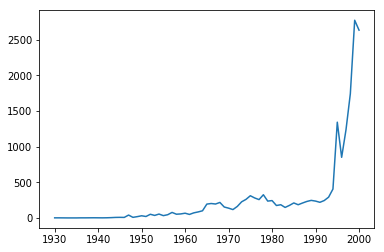

In [115]:
ufo_sight.Year.value_counts().sort_index().plot()

# How do I find and remove duplicate rows in pandas?

In [116]:
user_cols = ['user_id','age','gender','occupation','zip_code']

users1 = pd.read_csv('http://bit.ly/movieusers',delimiter = '|'
                    ,names = user_cols,header=None, index_col='user_id')

users1.head(2)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043


In [117]:
#sum of duplicate entries
users1.duplicated().sum()

7

In [118]:
#keep='first/last/false' marks first/last occurrence as original and marks others as duplicate
users1.loc[users1.duplicated(keep='first'),:]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [119]:
#Deleting duplicates
users1.drop_duplicates(keep='first').shape

(936, 4)

In [120]:
# to detect duplicate rows based on certain columns (age and zip_code)
users1.duplicated(subset=['age','zip_code']).sum()

16

# How do I change display options in pandas?

In [121]:
#DOES NOT AFFECT UNDERLYING DATA, ONLY WHAT IS DISPLAYED!
#Do not collapse intermediate rows while printing
pd.set_option('display.max_rows',None)
drinks

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0.0,0,0,0.0,Asia
Albania,89.0,132,54,4.9,Europe
Algeria,25.0,0,14,0.7,Africa
Andorra,245.0,138,312,12.4,Europe
Angola,217.0,57,45,5.9,Africa
Antigua & Barbuda,102.0,128,45,4.9,North America
Argentina,193.0,25,221,8.3,South America
Armenia,21.0,179,11,3.8,Europe
Australia,261.0,72,212,10.4,Oceania


In [122]:
# resetting it
pd.reset_option('display.max_rows')
drinks

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0.0,0,0,0.0,Asia
Albania,89.0,132,54,4.9,Europe
Algeria,25.0,0,14,0.7,Africa
Andorra,245.0,138,312,12.4,Europe
Angola,217.0,57,45,5.9,Africa
Antigua & Barbuda,102.0,128,45,4.9,North America
Argentina,193.0,25,221,8.3,South America
Armenia,21.0,179,11,3.8,Europe
Australia,261.0,72,212,10.4,Oceania


In [123]:
# column width
pd.set_option('display.max_colwidth',1000)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,0


In [124]:
# view decimals with precision of 2
pd.set_option('display.precision',2)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.28,C85,C,0


In [125]:
# to view other options
#pd.describe_option()
#pd.describe_option('rows') shows options with 'rows' keyword in them
#pd.reset_option('all') resets all options to default

# How do I create a pandas DataFrame from another object?

In [126]:
#Creating dataframe with dictionary
df = pd.DataFrame({'id':[100,101,102], 'color':['red','blue','red']})

In [127]:
pd.DataFrame([[100, 'red'], [101,'blue'], [102,'red']], columns=['id','color'])

,id,color
0,100,red
1,101,blue
2,102,red


In [128]:
# Convert numpy array into dataframe
arr = np.random.rand(4,2)
arr

array([[0.42283979, 0.88437855],
       [0.57228341, 0.15116701],
       [0.14544623, 0.90584244],
       [0.78195266, 0.22537336]])

In [129]:
pd.DataFrame(arr, columns=['one','two'])

,one,two
0,0.42,0.88
1,0.57,0.15
2,0.15,0.91
3,0.78,0.23


In [130]:
pd.DataFrame({'student':np.arange(100,110,1), 'test':np.random.randint(60,101,10) })

,student,test
0,100,69
1,101,74
2,102,90
3,103,73
4,104,90
5,105,70
6,106,73
7,107,82
8,108,90
9,109,100


# How do I apply a function to a pandas Series or DataFrame?

In [131]:
# Apply function to each element of a column
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.28,C85,C,0


In [132]:
train['Name_len'] = train['Name'].apply(len) #apply(name_of_fn)
train.loc[0:2,['Name','Name_len']]

,Name,Name_len
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",51
2,"Heikkinen, Miss. Laina",22


In [133]:
train.Name.str.split(',').head(2) #splits from comma

0                                [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs Thayer)]
Name: Name, dtype: object

In [134]:
def get_elements(lis, pos):
    return lis[pos]

In [135]:
train.Name.str.split(',').apply(get_elements,pos = 0).head(2)

0     Braund
1    Cumings
Name: Name, dtype: object

In [136]:
drinks.loc[:,['beer_servings','wine_servings','spirit_servings']].apply(max,axis=0).astype(int)

beer_servings      376
wine_servings      370
spirit_servings    438
dtype: int32

In [137]:
# to check which column has the largest column value
drinks.loc[:,['beer_servings','wine_servings','spirit_servings']].apply(np.argmax,axis=1).head(2)

C:\Users\saxen\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


country
Afghanistan      beer_servings
Albania        spirit_servings
dtype: object

In [138]:
#applymap applies fn to every element of dataframe (NOT EVERY COLUMN OR ROW)
drinks.loc[:,'beer_servings':'wine_servings'] = drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)
drinks.head(2)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0.0,0.0,0.0,0.0,Asia
Albania,89.0,132.0,54.0,4.9,Europe


# How do I use the MultiIndex in pandas?

In [139]:
import pandas as pd

In [140]:
stocks = pd.read_csv('http://bit.ly/smallstocks')

In [141]:
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [142]:
stocks.index

RangeIndex(start=0, stop=9, step=1)

In [143]:
stocks.groupby('Symbol').Close.mean()

Symbol
AAPL    112.86
CSCO     31.48
MSFT     57.43
Name: Close, dtype: float64

In [144]:
ser = stocks.groupby(['Symbol','Date']).Close.mean()
ser

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [145]:
ser.index

MultiIndex(levels=[['AAPL', 'CSCO', 'MSFT'], ['2016-10-03', '2016-10-04', '2016-10-05']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Symbol', 'Date'])

In [146]:
#Unstacking a 'multiindex' series makes it a dataframe
ser.unstack()

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [147]:
# Method II using pivot_table
sdf = stocks.pivot_table(index = 'Symbol', columns = 'Date', values='Close')
sdf

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [148]:
# Multiindex selection
ser.loc['AAPL']

Date
2016-10-03    112.52
2016-10-04    113.00
2016-10-05    113.05
Name: Close, dtype: float64

In [149]:
ser.loc['AAPL','2016-10-04']

113.0

In [150]:
ser.loc[:,'2016-10-04']

Symbol
AAPL    113.00
CSCO     31.35
MSFT     57.24
Name: Close, dtype: float64

In [151]:
stocks.set_index(['Symbol','Date'], inplace=True)
stocks

,,Close,Volume
Symbol,Date,,
CSCO,2016-10-03,31.50,14070500
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500
AAPL,2016-10-04,113.00,29736800
MSFT,2016-10-04,57.24,20085900
CSCO,2016-10-04,31.35,18460400
MSFT,2016-10-05,57.64,16726400
CSCO,2016-10-05,31.59,11808600
AAPL,2016-10-05,113.05,21453100


In [152]:
stocks.sort_index(inplace=True)

In [153]:
stocks

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [154]:
# Viewing all stocks for given dates
#stocks.loc[(:,['2016-10-03','2016-10-04']), : ] won't work
stocks.loc[(slice(None),['2016-10-03','2016-10-04']), : ]

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900

In [155]:
#to reset index dataframe.reset_index()

# Time - Saving tricks

In [156]:
#Prints version
pd.__version__

'0.23.4'

### 1.Creating datetime column from a dataframe

In [157]:
df = pd.DataFrame([[12,25,2017,10], [1,15,2018,11]],
                  columns=['month','day','year','hour'])
df

,month,day,year,hour
0,12,25,2017,10
1,1,15,2018,11


In [158]:
# create datetime series from dataframe
pd.to_datetime(df)

0   2017-12-25 10:00:00
1   2018-01-15 11:00:00
dtype: datetime64[ns]

In [159]:
# create datetime series from dataframe with subset of columns
pd.to_datetime(df[['month','day','year']])

0   2017-12-25
1   2018-01-15
dtype: datetime64[ns]

# Joining/Merging Dataframes

Joining (Merging) DataFrames
Using the MovieLens 100k data, let's create two DataFrames:

movies: shows information about movies, namely a unique movie_id and its title
ratings: shows the rating that a particular user_id gave to a particular movie_id at a particular timestamp

In [161]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [168]:
movie_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.item'
movie_cols = ['movie_id', 'title']
movies = pd.read_table(movie_url, header = None, sep = '|', names = movie_cols, usecols = [0,1], encoding = 'latin-1')
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [169]:
rating_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.data'
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(rating_url, names = rating_cols, header = None, sep = '\t')
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [170]:
# Examining ratings dataframe but using 'movie names' instead of id

In [172]:
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [173]:
A = pd.DataFrame({'color': ['green', 'yellow', 'red'], 'num':[1, 2, 3]})
A

,color,num
0,green,1
1,yellow,2
2,red,3


In [174]:
B = pd.DataFrame({'color': ['green', 'yellow', 'pink'], 'size':['S', 'M', 'L']})
B

,color,size
0,green,S
1,yellow,M
2,pink,L


In [175]:
#INNER JOIN
pd.merge(A, B, how = 'inner')

,color,num,size
0,green,1,S
1,yellow,2,M


In [176]:
#OUTER JOIN
pd.merge(A, B, how = 'outer')

,color,num,size
0,green,1.0,S
1,yellow,2.0,M
2,red,3.0,NaN
3,pink,NaN,L


In [177]:
#LEFT JOIN
pd.merge(A, B, how = 'right')

,color,num,size
0,green,1.0,S
1,yellow,2.0,M
2,pink,NaN,L


In [179]:
#Right Join
pd.merge(A, B, how = 'left')

,color,num,size
0,green,1,S
1,yellow,2,M
2,red,3,NaN
